## Predictive Modeling for Vehicle Prices

### Objective

We aim to create a robust and scalable predictive model capable of estimating both current and future prices of vehicles using historical sales data. The model will help in understanding key factors influencing prices and assist users in making informed decisions regarding vehicle purchases and sales.

#### Data Loading and Preparation

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [9]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/Big Data/Capstone/sample_data_100k.csv")

<ipython-input-9-0d3b7f4b37f8>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Big Data/Capstone/sample_data_100k.csv")


In [10]:
data.head()

,Unnamed: 0,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,0,SALYK2FV7LA250497,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,...,A,8-Speed Automatic Overdrive,t85617,P340 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
1,1,1C3CCCAB3GN124951,37.6 in,NaN,NaN,NaN,Sedan,NaN,Bronx,23.0,...,A,9-Speed Automatic,t58595,Limited Sedan FWD,NaN,FWD,Front-Wheel Drive,108 in,73.6 in,2016
2,2,ZACNJBC11KPK05419,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,...,A,9-Speed Automatic Overdrive,t83346,Trailhawk 4WD,NaN,4WD,Four-Wheel Drive,101.2 in,79.6 in,2019
3,3,1C4RDJDG2JC150071,38.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bronx,18.0,...,A,8-Speed Automatic,t75321,GT AWD,NaN,AWD,All-Wheel Drive,119.8 in,85.5 in,2018
4,4,2GNALBEK2G6249104,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bay Shore,NaN,...,A,6-Speed Automatic Overdrive,t58666,LT FWD,NaN,FWD,Front-Wheel Drive,112.5 in,72.5 in,2016


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100040 entries, 0 to 100039
Data columns (total 67 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               100040 non-null  int64  
 1   vin                      100040 non-null  object 
 2   back_legroom             94722 non-null   object 
 3   bed                      659 non-null     object 
 4   bed_height               14110 non-null   object 
 5   bed_length               14110 non-null   object 
 6   body_type                99607 non-null   object 
 7   cabin                    2058 non-null    object 
 8   city                     100040 non-null  object 
 9   city_fuel_economy        83760 non-null   float64
 10  combine_fuel_economy     0 non-null       float64
 11  daysonmarket             100040 non-null  int64  
 12  dealer_zip               100040 non-null  object 
 13  description              97428 non-null   object 
 14  engi

In [12]:
# Missing values

data.isnull().sum()

Unnamed: 0                  0
vin                         0
back_legroom             5318
bed                     99381
bed_height              85930
                        ...  
wheel_system             4919
wheel_system_display     4919
wheelbase                5318
width                    5318
year                        0
Length: 67, dtype: int64

In [13]:
# Selecting relevant variables for further analysis

relevant_variables = [
    'engine_type',
    'mileage',
    'year',
    'horsepower',
    'model_name',
    'make_name',
    'body_type',
    'fuel_type',
    'transmission',
    'wheel_system_display',
    'city_fuel_economy',
    'highway_fuel_economy',
    'price'
]

data_updated = data[relevant_variables]

data_updated.head()

,engine_type,mileage,year,horsepower,model_name,make_name,body_type,fuel_type,transmission,wheel_system_display,city_fuel_economy,highway_fuel_economy,price
0,V6,88.0,2020,340.0,Range Rover Velar,Land Rover,SUV / Crossover,Gasoline,A,All-Wheel Drive,NaN,NaN,70742.0
1,I4,25794.0,2016,184.0,200,Chrysler,Sedan,Gasoline,A,Front-Wheel Drive,23.0,36.0,13000.0
2,I4,20.0,2019,177.0,Renegade,Jeep,SUV / Crossover,Gasoline,A,Four-Wheel Drive,NaN,NaN,31221.0
3,V6,15732.0,2018,295.0,Durango,Dodge,SUV / Crossover,Gasoline,A,All-Wheel Drive,18.0,25.0,27300.0
4,I4,35363.0,2016,182.0,Equinox,Chevrolet,SUV / Crossover,Gasoline,A,Front-Wheel Drive,NaN,NaN,13823.0


In [14]:
# Missing values

data_updated.isnull().sum()

engine_type              3314
mileage                  4841
year                        0
horsepower               5766
model_name                  0
make_name                   0
body_type                 433
fuel_type                2716
transmission             2216
wheel_system_display     4919
city_fuel_economy       16280
highway_fuel_economy    16280
price                       0
dtype: int64

In [15]:
# Missing values per column
missing_values = data_updated.isnull().sum()

# Percentage of missing values per column
missing_percentage = (missing_values / len(data_updated)) * 100

# Display missing values and percentages
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info

,Missing Values,Percentage
engine_type,3314,3.312675
mileage,4841,4.839064
year,0,0.000000
horsepower,5766,5.763695
model_name,0,0.000000
make_name,0,0.000000
body_type,433,0.432827
fuel_type,2716,2.714914
transmission,2216,2.215114
wheel_system_display,4919,4.917033


In [16]:
# Remove rows with missing values
data_cleaned = data_updated.dropna(

    subset = [
        'engine_type',
        'mileage',
        'horsepower',
        'body_type',
        'fuel_type',
        'transmission',
        'wheel_system_display',
        'city_fuel_economy',
        'highway_fuel_economy'
        ]

    )

print("Missing values after dropping:")

print(data_cleaned.isnull().sum())

# Shape of the cleaned data
print("Shape of the cleaned data:", data_cleaned.shape)

Missing values after dropping:
engine_type             0
mileage                 0
year                    0
horsepower              0
model_name              0
make_name               0
body_type               0
fuel_type               0
transmission            0
wheel_system_display    0
city_fuel_economy       0
highway_fuel_economy    0
price                   0
dtype: int64
Shape of the cleaned data: (78103, 13)


In [17]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78103 entries, 1 to 100039
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   engine_type           78103 non-null  object 
 1   mileage               78103 non-null  float64
 2   year                  78103 non-null  int64  
 3   horsepower            78103 non-null  float64
 4   model_name            78103 non-null  object 
 5   make_name             78103 non-null  object 
 6   body_type             78103 non-null  object 
 7   fuel_type             78103 non-null  object 
 8   transmission          78103 non-null  object 
 9   wheel_system_display  78103 non-null  object 
 10  city_fuel_economy     78103 non-null  float64
 11  highway_fuel_economy  78103 non-null  float64
 12  price                 78103 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 8.3+ MB


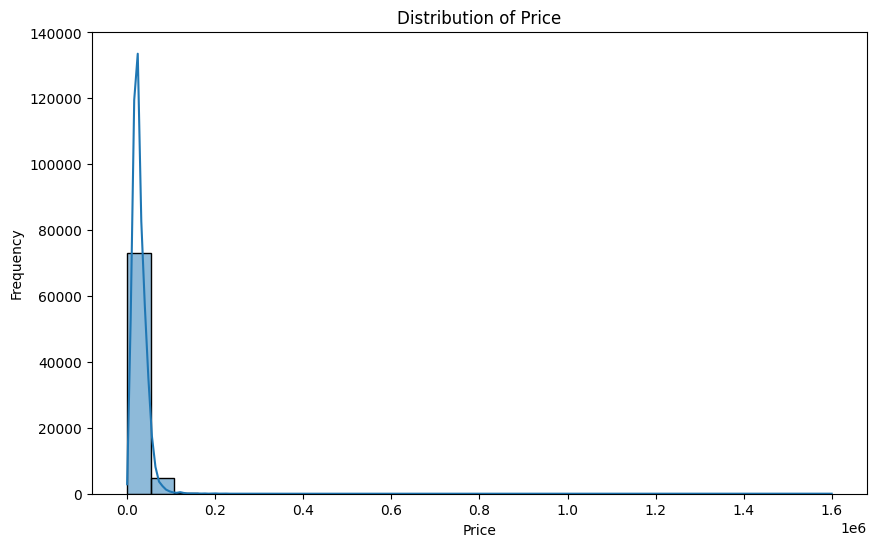

In [18]:
# Distribution of price

plt.figure(figsize = (10, 6))

sns.histplot(data_cleaned['price'], kde = True, bins = 30)

plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

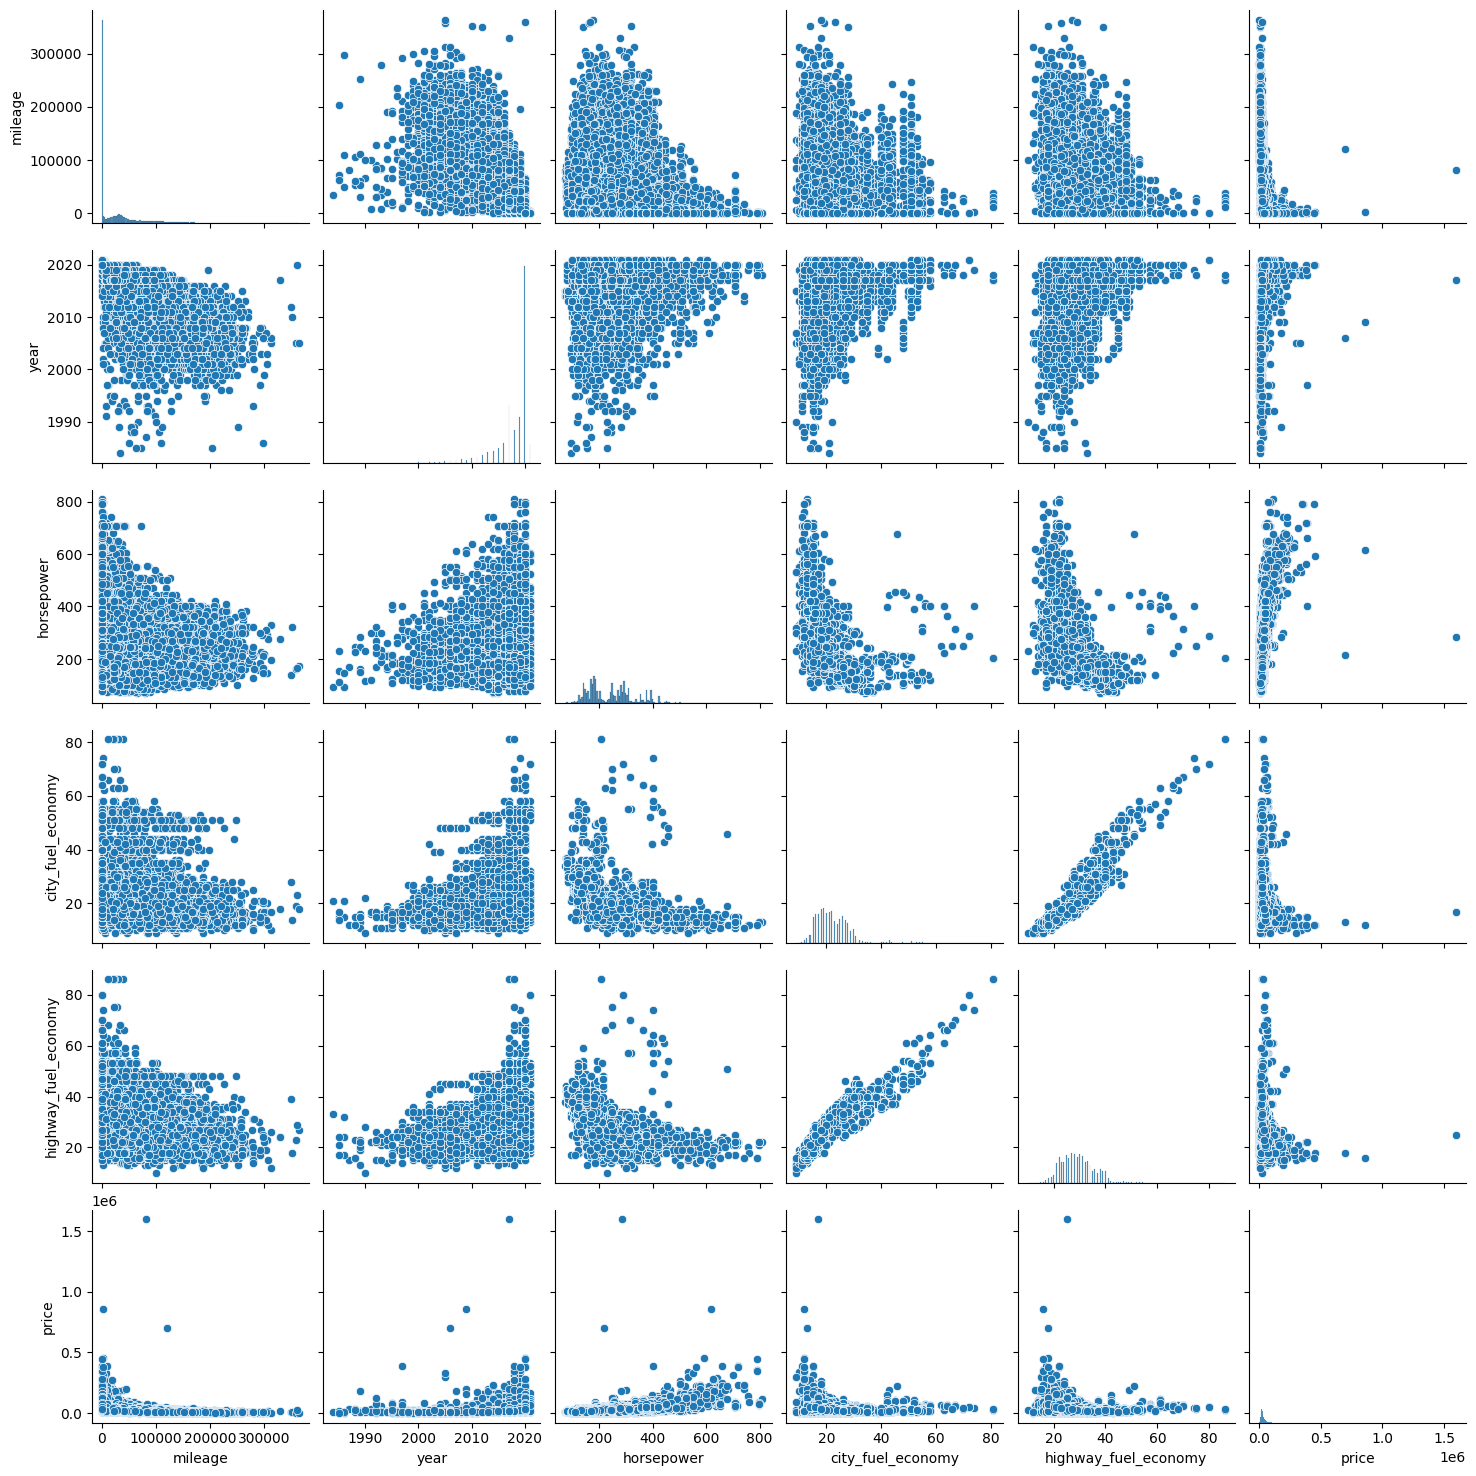

In [19]:
# Distribution of numerical variables
numerical_vars = ['mileage', 'year', 'horsepower', 'city_fuel_economy', 'highway_fuel_economy', 'price']

sns.pairplot(data_cleaned[numerical_vars])

plt.show()

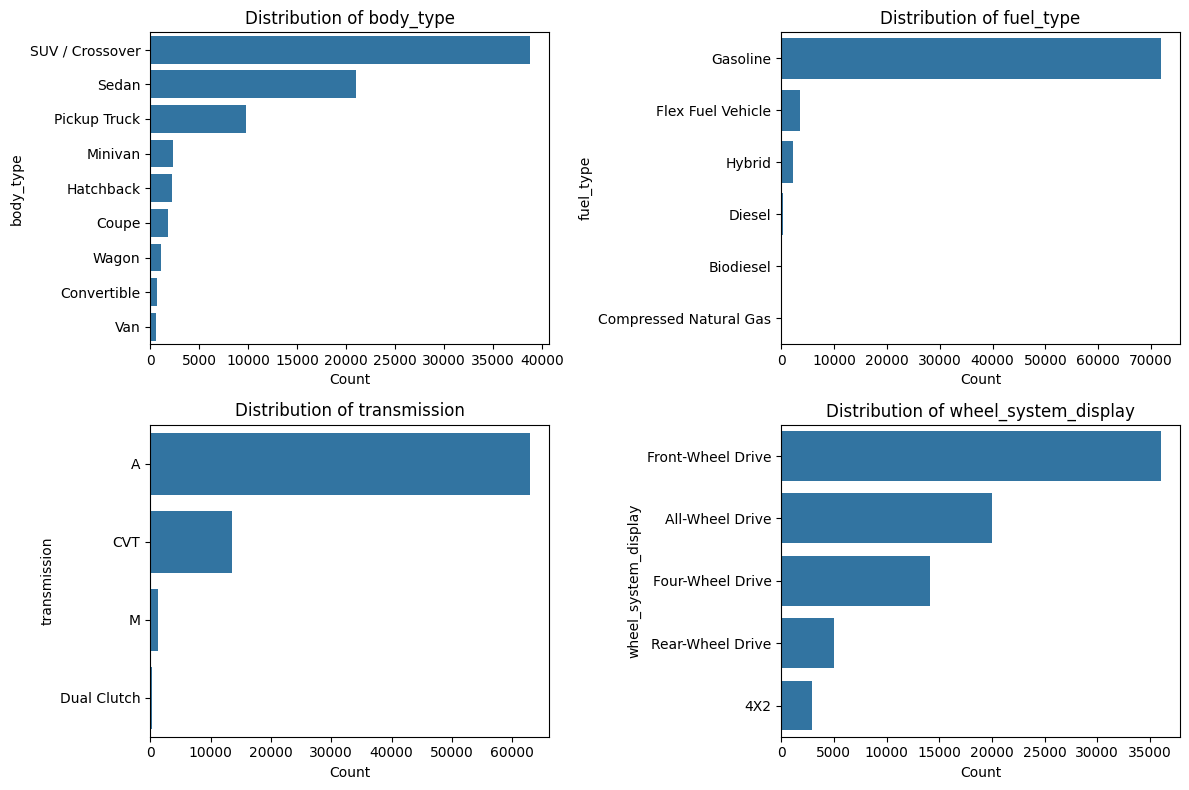

In [20]:
# List of categorical variables
categorical_vars = ['body_type', 'fuel_type', 'transmission', 'wheel_system_display']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

axes = axes.flatten()

# Plot each categorical variable in a subplot
for i, var in enumerate(categorical_vars):

    sns.countplot(y = data_cleaned[var], order = data_cleaned[var].value_counts().index, ax = axes[i])

    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(var)

if len(categorical_vars) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

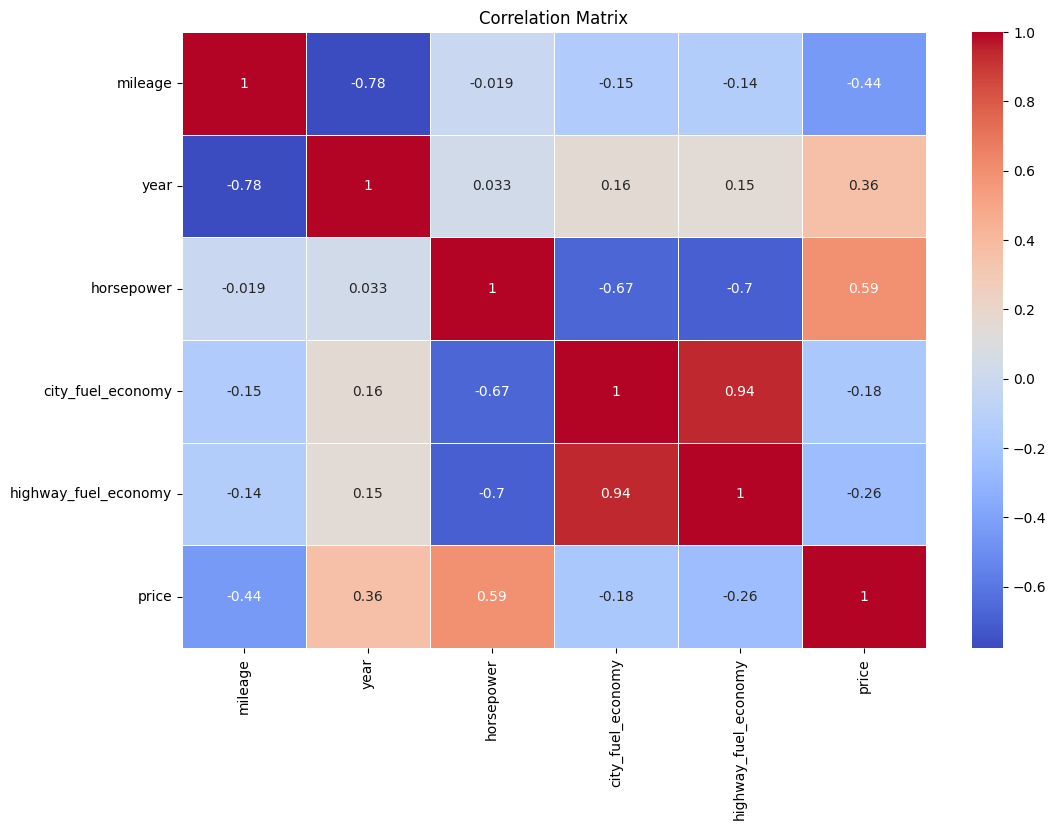

In [21]:
# Correlation matrix of numerical variables

plt.figure(figsize = (12, 8))

corr_matrix = data[numerical_vars].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Top 10 variables - 'engine_type', 'model_name', 'make_name'
cat_vars = ['engine_type', 'model_name', 'make_name']

# Display the top 10 values for each variable
for var in cat_vars:
    print(f"Top 10 values for {var}:")
    top_10_values = data_updated[var].value_counts().head(10)
    print(top_10_values)
    print("\n")

Top 10 values for engine_type:
engine_type
I4                      47570
V6                      24456
V8                       9134
V8 Flex Fuel Vehicle     2683
I4 Hybrid                2500
H4                       2259
V6 Flex Fuel Vehicle     2220
I3                       1809
I6                        924
I6 Diesel                 748
Name: count, dtype: int64


Top 10 values for model_name:
model_name
F-150             4289
Silverado 1500    2404
1500              2394
Equinox           2044
Escape            1895
Rogue             1744
Explorer          1658
Grand Cherokee    1530
Camry             1449
CR-V              1436
Name: count, dtype: int64


Top 10 values for make_name:
make_name
Ford         15851
Chevrolet    12296
Toyota        8002
Nissan        7373
Honda         7246
Jeep          5631
Hyundai       4566
Kia           3835
RAM           3476
GMC           3252
Name: count, dtype: int64




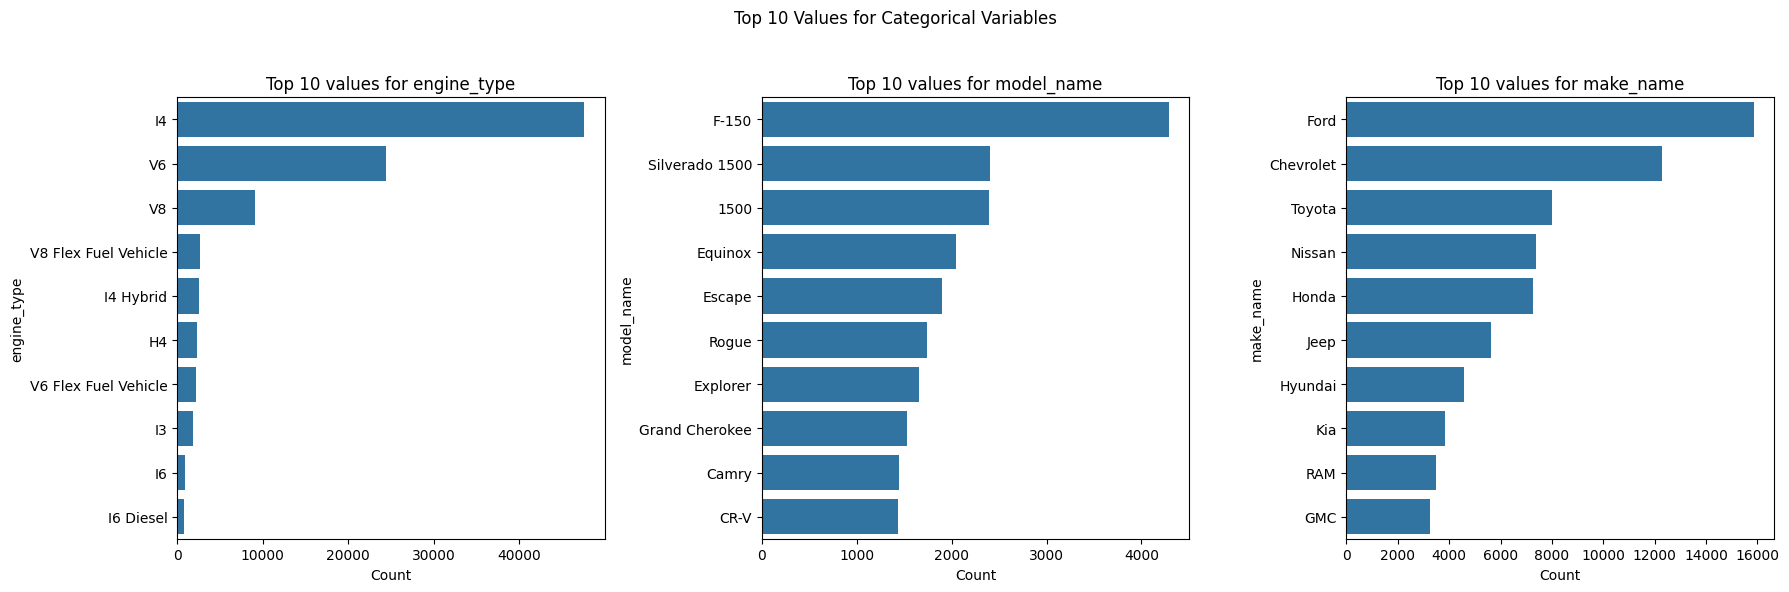

In [23]:
# Top 10 variables - 'engine_type', 'model_name', 'make_name'

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))

fig.suptitle('Top 10 Values for Categorical Variables')

for ax, var in zip(axes, cat_vars):

    top_10_values = data_updated[var].value_counts().head(10)

    sns.barplot(x=top_10_values.values, y=top_10_values.index, ax = ax)
    ax.set_title(f'Top 10 values for {var}')
    ax.set_xlabel('Count')
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Feature Engineering

In [24]:
# Condense the engine types

def cluster_engine_types(engine_type):

    if pd.isnull(engine_type):
        return np.nan
    if 'v6' in engine_type.lower():
        return 'V6'
    elif 'v8' in engine_type.lower():
        return 'V8'
    elif 'v12' in engine_type.lower():
        return 'V12'
    elif 'v10' in engine_type.lower():
        return 'V10'
    elif 'i4' in engine_type.lower():
        return 'I4'
    elif 'i6' in engine_type.lower():
        return 'I6'
    else:
        return engine_type

data_cleaned.loc[:, 'engine_type'] = data_cleaned['engine_type'].apply(cluster_engine_types)

In [25]:
# Remove Outliers for mileage and year (beyond 3 standard deviations)

def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    threshold = 3 * std
    df = df[(df[column] >= mean - threshold) & (df[column] <= mean + threshold)]
    return df

data_cleaned = remove_outliers(data_cleaned, 'mileage')
data_cleaned = remove_outliers(data_cleaned, 'year')

In [26]:
# Exclude 'Wagon' from 'body_type'
data_cleaned = data_cleaned[data_cleaned ['body_type'] != 'Wagon']

# Exclude 'Compressed Natural Gas' from 'fuel_type'
data_cleaned = data_cleaned[data_cleaned['fuel_type'] != 'Compressed Natural Gas']

In [27]:
# Calculate Average Fuel Economy

data_cleaned['average_fuel_economy'] = (data_cleaned['city_fuel_economy'] + data_cleaned['highway_fuel_economy']) / 2

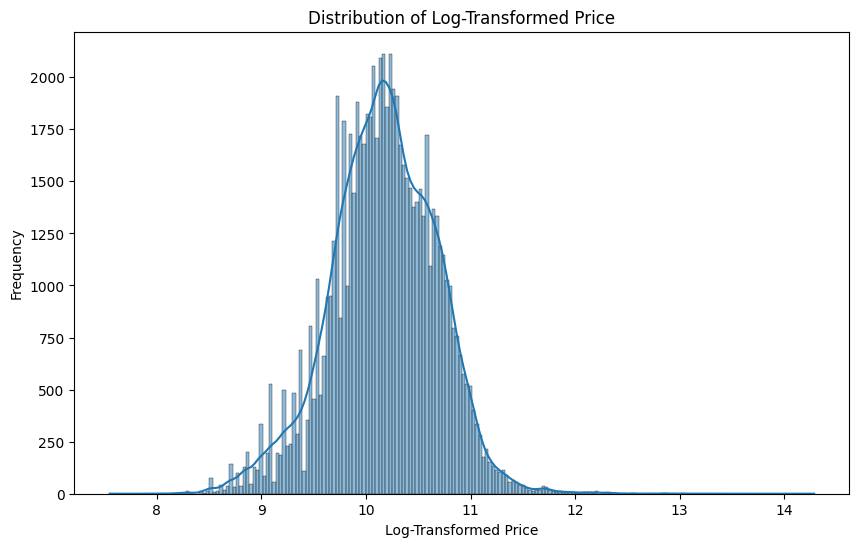

In [28]:
# Log Transforming the price column
data_cleaned['price_log'] = np.log1p(data_cleaned['price'])

# Distribution of log of price - transformed price to gaussian distribution
plt.figure(figsize = (10, 6))

sns.histplot(data_cleaned['price_log'], kde = True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Select relevant variables

relevant_variables = [
    'engine_type',
    'mileage',
    'year',
    'horsepower',
    'model_name',
    'make_name',
    'body_type',
    'fuel_type',
    'transmission',
    'wheel_system_display',
    'average_fuel_economy',
    'price_log'
]

data_cleaned = data_cleaned[relevant_variables]

data_cleaned.head()

,engine_type,mileage,year,horsepower,model_name,make_name,body_type,fuel_type,transmission,wheel_system_display,average_fuel_economy,price_log
1,I4,25794.0,2016,184.0,200,Chrysler,Sedan,Gasoline,A,Front-Wheel Drive,29.5,9.472782
3,V6,15732.0,2018,295.0,Durango,Dodge,SUV / Crossover,Gasoline,A,All-Wheel Drive,21.5,10.214679
7,I4,4580.0,2018,138.0,Trax,Chevrolet,SUV / Crossover,Gasoline,A,Front-Wheel Drive,29.0,9.663007
8,I4,25122.0,2018,180.0,Cherokee,Jeep,SUV / Crossover,Gasoline,A,Four-Wheel Drive,24.0,9.952325
11,V6,61161.0,2014,241.0,Grand Cherokee,Jeep,SUV / Crossover,Gasoline,A,Four-Wheel Drive,20.5,9.758520


In [30]:
data_cleaned.to_csv('data_cleaned.csv', index=False)

In [31]:
# Label Encoding of categorical variables

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoders = {}

for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        data_cleaned[col] = le.fit_transform(data_cleaned[col])
        label_encoders[col] = le

# Save label encoders
for col, le in label_encoders.items():
    np.save(f'label_encoder_{col}.npy', le.classes_)

In [32]:
data_cleaned.dropna()

,engine_type,mileage,year,horsepower,model_name,make_name,body_type,fuel_type,transmission,wheel_system_display,average_fuel_economy,price_log
1,4,25794.0,2016,184.0,5,9,6,3,0,3,29.5,9.472782
3,10,15732.0,2018,295.0,158,10,5,3,0,1,21.5,10.214679
7,4,4580.0,2018,138.0,511,8,5,3,0,3,29.0,9.663007
8,4,25122.0,2018,180.0,116,21,5,3,0,2,24.0,9.952325
11,10,61161.0,2014,241.0,253,21,5,3,0,2,20.5,9.758520
...,...,...,...,...,...,...,...,...,...,...,...,...
100034,10,20009.0,2017,278.0,497,46,4,3,0,2,20.5,10.621181
100035,4,41897.0,2018,170.0,184,8,5,3,0,3,29.0,9.798071
100036,10,5.0,2020,310.0,510,8,5,3,0,3,22.5,10.504821
100038,4,27857.0,2017,180.0,553,20,6,1,0,1,35.0,10.203555


In [33]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73814 entries, 1 to 100039
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   engine_type           73814 non-null  int64  
 1   mileage               73814 non-null  float64
 2   year                  73814 non-null  int64  
 3   horsepower            73814 non-null  float64
 4   model_name            73814 non-null  int64  
 5   make_name             73814 non-null  int64  
 6   body_type             73814 non-null  int64  
 7   fuel_type             73814 non-null  int64  
 8   transmission          73814 non-null  int64  
 9   wheel_system_display  73814 non-null  int64  
 10  average_fuel_economy  73814 non-null  float64
 11  price_log             73814 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 7.3 MB


#### Model Building

In [34]:
from sklearn.model_selection import train_test_split
import joblib

# Split the variables to features and target
X = data_cleaned.drop('price_log', axis = 1)

y = data_cleaned['price_log']

mm_scaler = MinMaxScaler(feature_range = (0,1))

X_scaled = mm_scaler.fit_transform(X)

X_scaled = pd.DataFrame(X, columns = X.columns)

# Save the scaler
joblib.dump(mm_scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [35]:
# Splitting the datasets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Define and Train Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Trees': DecisionTreeRegressor(random_state = 42),
    'Random Forest': RandomForestRegressor(n_estimators = 100, random_state = 42),
    'XGBoost': XGBRegressor(n_estimators = 100, random_state = 42)
}

# Store evaluation metrics
metrics = {}
trained_models = {}

# Evaluate Models
for name, model in models.items():

    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)

    y_test_pred = model.predict(X_test)

    # Calculate metrics
    val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store metrics
    metrics[name] = {
        'val_rmse': val_rmse,
        'val_mae': val_mae,
        'val_r2': val_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2
    }

    # Store trained models
    trained_models[name] = model

    # Print metrics
    print(f'{name}')
    print('Validation Set Metrics:')
    print(f'  RMSE: {val_rmse}')
    print(f'  MAE: {val_mae}')
    print(f'  R²: {val_r2}\n')

    print('Test Set Metrics:')
    print(f'  RMSE: {test_rmse}')
    print(f'  MAE: {test_mae}')
    print(f'  R²: {test_r2}\n')

# Determine the best model based on test RMSE
best_model_name = min(metrics, key = lambda x: metrics[x]['test_rmse'])
best_model = trained_models[best_model_name]
best_model_metrics = metrics[best_model_name]

print(f'Best Model: {best_model_name}')
print('Metrics:')
print(f'  Validation RMSE: {best_model_metrics["val_rmse"]}')
print(f'  Validation MAE: {best_model_metrics["val_mae"]}')
print(f'  Validation R²: {best_model_metrics["val_r2"]}')
print(f'  Test RMSE: {best_model_metrics["test_rmse"]}')
print(f'  Test MAE: {best_model_metrics["test_mae"]}')
print(f'  Test R²: {best_model_metrics["test_r2"]}')

# Save the best model to a file
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl')

print(f'Best model ({best_model_name}) saved successfully.')

Linear Regression
Validation Set Metrics:
  RMSE: 0.21425994248703348
  MAE: 0.16506286174826365
  R²: 0.8264235596475449

Test Set Metrics:
  RMSE: 0.2179896461063032
  MAE: 0.1650350098599606
  R²: 0.8161303536476531

Decision Trees
Validation Set Metrics:
  RMSE: 0.16388514958995
  MAE: 0.11966488233499864
  R²: 0.8984481093092459

Test Set Metrics:
  RMSE: 0.17151606453888835
  MAE: 0.11930666980203196
  R²: 0.8861723120917561

Random Forest
Validation Set Metrics:
  RMSE: 0.13113586395085447
  MAE: 0.09852345766013673
  R²: 0.9349792801356421

Test Set Metrics:
  RMSE: 0.13809869507110997
  MAE: 0.09860543103331056
  R²: 0.9262066106967373

XGBoost
Validation Set Metrics:
  RMSE: 0.12263624546322005
  MAE: 0.09385400974364723
  R²: 0.943134809051915

Test Set Metrics:
  RMSE: 0.13074172725216943
  MAE: 0.09425134402872223
  R²: 0.9338596110506744

Best Model: XGBoost
Metrics:
  Validation RMSE: 0.12263624546322005
  Validation MAE: 0.09385400974364723
  Validation R²: 0.9431348090